In [1]:
%matplotlib inline 
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import glob
import random
import re
import time
import math
import os
import sys
from sklearn.utils import shuffle

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.objectives import categorical_crossentropy

Using TensorFlow backend.


In [2]:
import importlib
sys.path.append('..')
import Shared  # Shared.py holds functions common to all notebooks
importlib.reload(Shared)  # In case you make changes to the Shared.py file and don't want to restart the nb kernel 

<module 'Shared' from '../Shared.py'>

In [3]:
nb_name = 'quickdraw-AE_784f_500f_500f_2000f_2f_20ep'  # Couldn't figure out how to get this automatically

In [4]:
X, info_df, n_revisions, CATEGORIES = Shared.load_drawings('../../Datasets/quickdraw/')
# Flatten Nx28x28 -> Nx784x1
N = len(X)
# np.reshape(X, (len(X), 1, 784))
X_flat = np.reshape(np.ravel(X), (N, -1))
len(X), len(info_df), n_revisions, CATEGORIES

(53400,
 53400,
 89,
 {0: 'airplane',
  1: 'banana',
  2: 'baseball',
  3: 'bicycle',
  4: 'carrot',
  5: 'cello'})

In [5]:
info_df.head()

,X_index,drawing_cat_id,drawing_cat_str,drawing_id,t
0,0,5,cello,113947,41
1,1,4,carrot,41438,42
2,2,3,bicycle,29295,36
3,3,4,carrot,94260,79
4,4,3,bicycle,18402,58


In [6]:
X_flat.shape

(53400, 784)

In [15]:
n = X_flat.shape[1]
ae = Sequential()
ae.add(Dense(500, activation='relu', input_shape=(n,)))
ae.add(Dense(500, activation='relu'))
ae.add(Dense(2000, activation='relu'))
ae.add(Dense(2))
ae.add(Dense(2000, activation='relu'))
ae.add(Dense(500, activation='relu'))
ae.add(Dense(500, activation='relu'))
ae.add(Dense(n))

In [16]:
ae.compile(loss='mse', optimizer='adam')

In [17]:
%time ae.fit(X_flat, X_flat, nb_epoch=20)

/home/eduardo/.local/share/virtualenvs/dynamic-projections-ak_z834q/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
53400/53400 [==============================] - 130s 2ms/step - loss: 0.0754
Epoch 2/20
53400/53400 [==============================] - 120s 2ms/step - loss: 0.0673
Epoch 3/20
53400/53400 [==============================] - 121s 2ms/step - loss: 0.0614
Epoch 4/20
53400/53400 [==============================] - 115s 2ms/step - loss: 0.0560
Epoch 5/20
53400/53400 [==============================] - 112s 2ms/step - loss: 0.0518
Epoch 6/20
53400/53400 [==============================] - 113s 2ms/step - loss: 0.0483
Epoch 7/20
53400/53400 [==============================] - 113s 2ms/step - loss: 0.0457
Epoch 8/20
53400/53400 [==============================] - 120s 2ms/step - loss: 0.0436
Epoch 9/20
53400/53400 [==============================] - 118s 2ms/step - loss: 0.0416
Epoch 10/20
53400/53400 [==============================] - 123s 2ms/step - loss: 0.0410
Epoch 11/20
53400/53400 [==============================] - 119s 2ms/step - loss: 0.0387
Epoch 12/20
53400/53400 [================

In [18]:
ae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_11 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 4002      
_________________________________________________________________
dense_13 (Dense)             (None, 2000)              6000      
_________________________________________________________________
dense_14 (Dense)             (None, 500)               1000500   
_________________________________________________________________
dense_15 (Dense)             (None, 500)               250500    
__________

In [19]:
# ae.save('../Models/{}.h5'.format(nb_name))

Text(0.5, 0.98, 'loss')

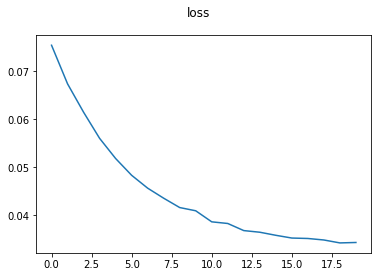

In [20]:
plt.figure()
plt.plot(ae.history.history['loss'])
plt.suptitle('loss')

In [21]:
Shared.save_drawing_activations(ae, X_flat, info_df, n_revisions, nb_name)

True